<a href="https://colab.research.google.com/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



<h1>The Used Cars Dataset Modelling</h1>

###Jashneet Kaur
###jks888@uregina.ca, Id 200380410
###University of Regina
###Spring / Summer 2019


## INRTRODUCTION

###Scikit Algorithm 
I have an option of two scikit algorithms from the figure provided in the assignment. I can select any one from the two algorithms, either Lasso or ElasticNet.

###Process and Justification
I have started to look for the algorithm from the provided figure itself. I have traced the figure with my requirements with the following steps:
####1: started and I have more than 50 dataset values
####2: I am not predicting a category. I am working on to predict a quantity that is I am analysing the statics of car pricing factors.
####3: I have less than 100k data set values so i move further in that direction from the figure.
####4: Now a few features are important to predict the car price like its transmission, odometer value, make and year of manufacturing. 
####5: I am a little confused while choosing the few features or more features for teh car price prediction. Hence, I have decided to implement the Lasso algorithm and the Ridge regression algorithm to see the prediction outcomes. In the end I will choose one of the two algorithms, which gives me better prediction ratios. So I have two modelling algorithms to implement in the upcoming sections.
####  Lasso
####  Ridge Regression
  
###Algorithm Working


NOTE: Here is a link to the file for better visuals : 
https://nbviewer.jupyter.org/github/jashanmalhi/Data-Analysis/blob/master/Used_Cars_Dataset.ipynb

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive

In [7]:
cd My Drive

/content/gdrive/My Drive


In [0]:

#Importing the required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
#read the file data into a ledger variable
ledger = pd.read_csv('CarList.csv') 
#delete the columns
del ledger["url"]
del ledger["city_url"]
del ledger["VIN"]
del ledger["image_url"]
del ledger["condition"]
#I have used the dropna command for all the rows where even any one column value is missing.
ledger = ledger.dropna()
#delete the rows where year < 1960 and price < 200 
ledger.drop(ledger[ledger.price < 200].index, inplace = True)
ledger.drop(ledger[ledger.year < 1960].index, inplace = True)
#sorted the listings by the year of manufacture in descending order
ledger.sort_values(["year"], ascending=False, inplace=True)
ledger.drop(ledger[ledger.price > 125000].index, inplace = True)
ledger = ledger.reset_index(drop=True)


Text(0.5, 1.0, 'Car price vs count of listings for that price')

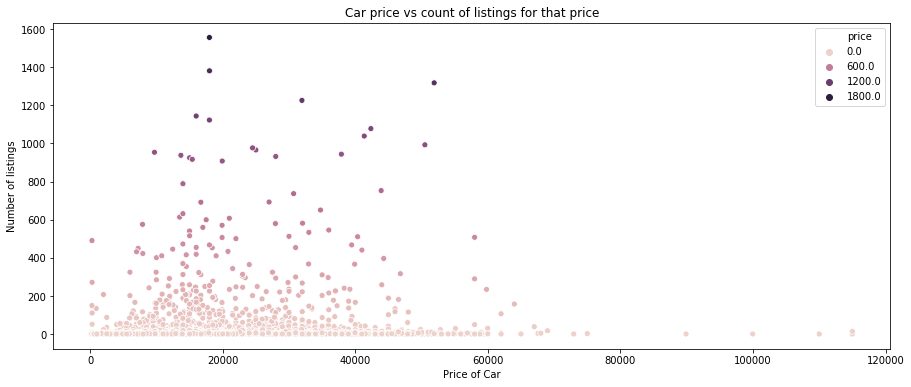

In [16]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="price", y=ledger['price'].value_counts(), hue=ledger['price'].value_counts(), data=ledger)
plt.xlabel("Price of Car")
plt.ylabel("Number of listings")
plt.title("Car price vs count of listings for that price")

# ALGORITHM APPLICATION

###Implementation

####Model Creation 

####Data Preparation

In [0]:
data = ledger

In [0]:
del data["type"]
del data["paint_color"]
del data["desc"]


In [67]:
data

,price,year,odometer,lat,long
0,10950,2020.0,6120.0,25.827103,-80.241520
1,46900,2020.0,8.0,30.175202,-85.667038
2,68600,2020.0,0.0,44.046267,-91.674145
3,270,2019.0,4500.0,34.263482,-118.905344
4,69480,2019.0,4233.0,44.520390,-88.066450
5,57339,2019.0,4.0,35.026800,-97.951800
6,38800,2019.0,800.0,45.128400,-93.458900
7,31295,2019.0,17969.0,35.026800,-97.951800
8,41990,2019.0,13058.0,43.153201,-75.927372
9,55900,2019.0,9410.0,38.837468,-104.791342


In [0]:
X = data.drop(['price'], axis=1)
y = data['price'].values.reshape(-1,1)

In [69]:
X

,year,odometer,lat,long
0,2020.0,6120.0,25.827103,-80.241520
1,2020.0,8.0,30.175202,-85.667038
2,2020.0,0.0,44.046267,-91.674145
3,2019.0,4500.0,34.263482,-118.905344
4,2019.0,4233.0,44.520390,-88.066450
5,2019.0,4.0,35.026800,-97.951800
6,2019.0,800.0,45.128400,-93.458900
7,2019.0,17969.0,35.026800,-97.951800
8,2019.0,13058.0,43.153201,-75.927372
9,2019.0,9410.0,38.837468,-104.791342


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

In [71]:
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [73]:
ridge_regressor.best_params_

{'alpha': 20}

In [74]:
ridge_regressor.best_score_

-159398924.89025837

In [75]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2130291111032.7256, tolerance: 461542582.871794
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3551661514145.023, tolerance: 914154697.4198143
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3753799703790.3228, tolerance: 973415869.9953316
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3756474703009.4

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [76]:
lasso_regressor.best_params_

{'alpha': 20}

In [77]:
lasso_regressor.best_score_

-159250079.50840974

**********************************************************************************************

# VISUALIZATION

####Data Visualization

####Labelling 

####Data Plottignl

####Regression r-squared values


# DISCUSSION

####Model Implications

####Fictional Instance

####Potential accuracy in interpolation and extrapolration

# SUMMARY

####Conclusion

####Future Aspects

####Knowledge gathered

# REFERENCES

Austin Reese (2019) "Used Cars Dataset" Vehicles listings from Craigslist.org. Available at: https://www.kaggle.com/austinreese/craigslist-carstrucks-data/version/7.


Tomesh, T. (2019). titanic.ipynb. Available at: https://colab.research.google.com/drive/1KftGp4lGzd7PJuKWq9qDv3xnxiQbwhwY#scrollTo=Y2tOGJ2UYPVi [Accessed 16 Aug. 2019].


Stach Overflow (2019) Available at https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame [Accessed 17 Aug 2019]


TutorialsPoint (2019 )Available at https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.html [Accessed 18 Aug 2019]


Chris ALbon (2017), "Using Seaborn To Visualize A pandas Dataframe"  Available at: https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/  [Accessed 18 Aug 2019]


Marco Peixeiro (2019), "How to Perform Lasso and Ridge Regression in Python" Available at: https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8
[Accessed 25 Aug 2019]